<a href="https://colab.research.google.com/github/tqnhu2407/Image_Processing/blob/master/img_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

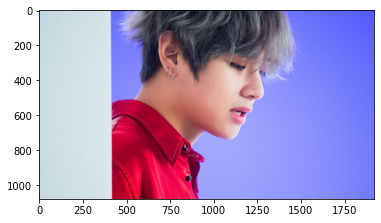

In [2]:
im = PIL.Image.open('bg-03.jpg')
im = np.array(im)
plt.imshow(im)

In [3]:
height, width = im.shape[0], im.shape[1]
pixels = np.reshape(im, (width*height, 3))

In [4]:
def change_brightness(im, height, width):
    
    result = im.tolist()
    
    for x in range(height):
        for y in range(width):
            for rgb in range(3):
                result[x][y][rgb] += 40

    plt.imshow(np.array(result))

In [5]:
def change_contrast(im, height, width):

    result = im.tolist()

    for x in range(height):
        for y in range(width):
            for rgb in range(3):

                if result[x][y][rgb] * 1.5 > 255:
                    result[x][y][rgb] = 255
                else:
                    result[x][y][rgb] = int(result[x][y][rgb] * 1.5)

    plt.imshow(np.array(result))

In [6]:
def flip_horizontal(im, height, width):

    result = im.tolist()

    for row in range(height):
        result[row].reverse()

    plt.imshow(np.array(result))

In [7]:
def flip_vertical(im, height, width):

    result = im.tolist()

    result = [[result[height - 1 - i][j] for j in range(width)] for i in range(height)]

    plt.imshow(np.array(result))

In [8]:
def blur(im, height, width):

    result = im.tolist()
    
    for blur_iter in range(5): # the more loops we have, the blurrier the image

        pix = result
        for x in range(1, height - 1):
            for y in range(1, width - 1):

                box = [] # This contain 3x3 box of the current pixel
                box.append(pix[x-1][y-1])
                box.append(pix[x][y-1])
                box.append(pix[x+1][y-1])
                box.append(pix[x-1][y])
                box.append(pix[x][y])
                box.append(pix[x+1][y])
                box.append(pix[x-1][y+1])
                box.append(pix[x][y+1])
                box.append(pix[x+1][y+1])
                avg0, avg1, avg2 = 0, 0, 0

                for i in range(9):
                    avg0 += box[i][0] # Sum of channel R
                    avg1 += box[i][1] # Sum of channel G
                    avg2 += box[i][2] # Sum of channel B

                result[x][y][0] = avg0 // 9 # Average of channel R
                result[x][y][1] = avg1 // 9 # Average of channel G
                result[x][y][2] = avg2 // 9 # Average of channel B
            
    plt.imshow(np.array(result))

In [9]:
def gray(im, height, width):
    result = []
    for row in range(height):
        result.append([])

    for row in range(height):
        for col in range(width):
            # Weighted method or luminosity method
            # New grayscale image = ( (0.3 * R) + (0.59 * G) + (0.11 * B) ).
            pixel = im[row][col]
            r, g, b = pixel[0], pixel[1], pixel[2]
            result[row].append(int(0.3*r + 0.59*g + 0.11*b))

    plt.imshow(np.array(result), cmap = 'gray')

51
<class 'int'>
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


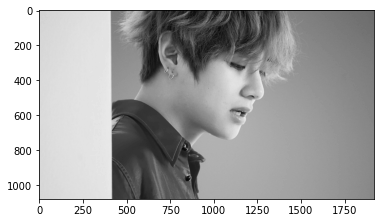

In [10]:
gray(im, height, width)

In [11]:
def combine(im1, im2, height, width):

    #-----------------------------------#
    # CALCULATE AVERAGE OF THE 2 IMAGES #
    #-----------------------------------#
    result = []
    for row in range(height):
        result.append([])

    for row in range(height):
        for col in range(width):

            pixel1 = np.array(im1[row][col], dtype = np.uint16)
            r1, g1, b1 = pixel1[0], pixel1[1], pixel1[2]
            
            pixel2 = np.array(im2[row][col], dtype = np.uint16)
            r2, g2, b2 = pixel2[0], pixel2[1], pixel2[2]

            color = [(r1 + r2) // 2, (g1 + g2) // 2, (b1 + b2) // 2]
            result[row].append(color)      
    #plt.imshow(np.array(result))
    
    #-----------------------#
    # CONVERT TO GRAY IMAGE #
    #-----------------------#
    final_result = []
    for row in range(height):
        final_result.append([])

    for row in range(height):
        for col in range(width):
            # Weighted method or luminosity method
            # New grayscale image = ( (0.3 * R) + (0.59 * G) + (0.11 * B) ).
            pixel = np.array(result[row][col], dtype = np.uint8)
            r, g, b = pixel[0], pixel[1], pixel[2]
            final_result[row].append(int(0.3*r + 0.59*g + 0.11*b))

    print(final_result[200][200])
    print(type(final_result[200][200]))
    print(type(pixel))
    print(type(r))
    plt.imshow(np.array(final_result), cmap = 'gray')

155
<class 'int'>
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


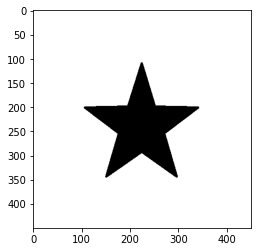

In [12]:
im1 = PIL.Image.open('red.png')
im1 = np.array(im1)

im2 = PIL.Image.open('yellow star.png')
im2 = np.array(im2)

height, width = im1.shape[0], im1.shape[1]

combine(im1, im2, height, width)